Name: Sharmin

Labpartner(s)

In [ ]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

**For today's lab you need to install the package cartopy**

In [68]:
# you can install packages here in a notebook with pip or conda, 
# or in the anaconda navigator in the environments tab (reccommended)

# pip install cartopy
# conda install cartopy

In [70]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Class 6.2

Today we will finish fiunction sharing and do more plotting

# Warmups 6.2

**W.1** (From Zach) Write some code that generates 15 random integers from 1-100. If the integers are divisible by 2 assign them to list "x" if they are divisible by three, assign them to list "y", if they are neither assign them to list "z". 

In [76]:
import random
random_integers = [random.randint(1, 100) for _ in range(15)]

# Initialize the lists
x = []  
y = []  
z = []  

# Assigning the numbers
for num in random_integers:
    if num % 2 == 0:
        x.append(num)
    elif num % 3 == 0:
        y.append(num)
    else:
        z.append(num)

print("Random integers:", random_integers)
print("Divisible by 2 (x):", x)
print("Divisible by 3 (y):", y)
print("Divisible by neither (z):", z)

Random integers: [97, 40, 24, 51, 1, 2, 81, 61, 31, 36, 15, 67, 67, 77, 42]
Divisible by 2 (x): [40, 24, 2, 36, 42]
Divisible by 3 (y): [51, 81, 15]
Divisible by neither (z): [97, 1, 61, 31, 67, 67, 77]


**W.2** Plot your lists together in some sensible way. Zach suggests a histogram with different colors for each list

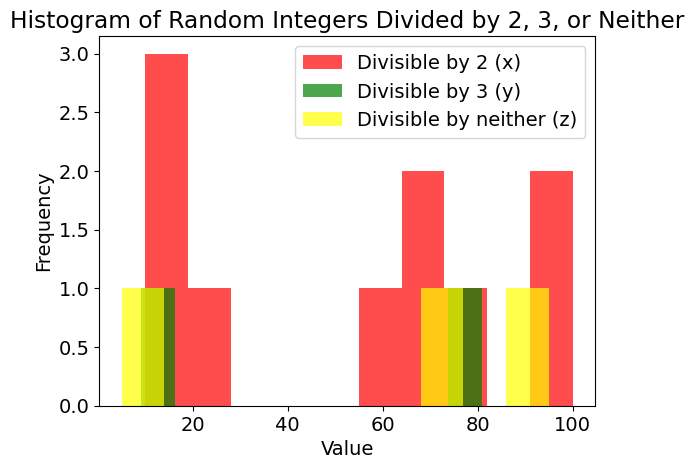

In [79]:
import matplotlib.pyplot as plt

x = [64, 100, 56, 94, 14, 20, 10, 18, 78, 72]
y = [81, 9]
z = [73, 95, 5]

# Creating a histogram 
plt.hist(x, bins=10, alpha=0.7, color='red', label='Divisible by 2 (x)')
plt.hist(y, bins=10, alpha=0.7, color='green', label='Divisible by 3 (y)')
plt.hist(z, bins=10, alpha=0.7, color='yellow', label='Divisible by neither (z)')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Integers Divided by 2, 3, or Neither')


plt.legend()
plt.show()

# Lecture 6.2

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - continued

### Questions

### Cartopy

Let's take the data we used last time and make the plot publication ready

There are a number of differnt map projections available in Cartopy.  https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

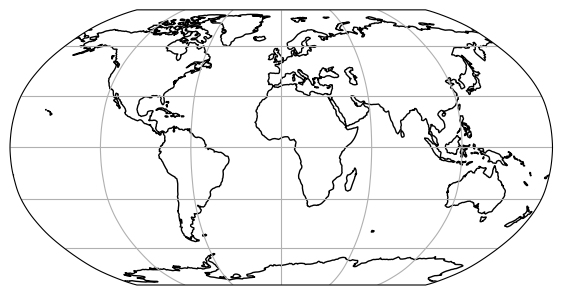

In [88]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

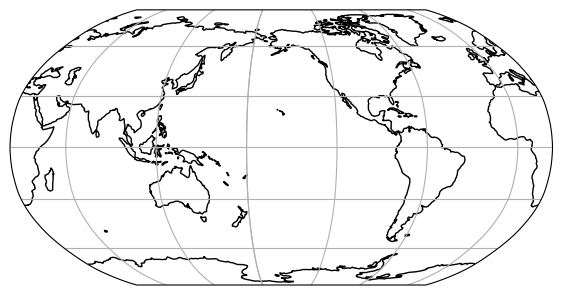

In [90]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the map to 203 degrees East
ax.coastlines(resolution='110m')
ax.gridlines()

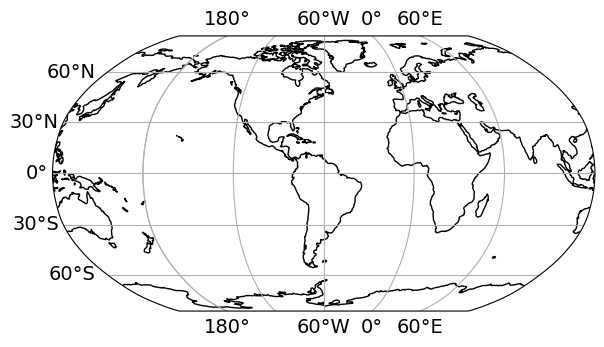

In [92]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = -60))
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

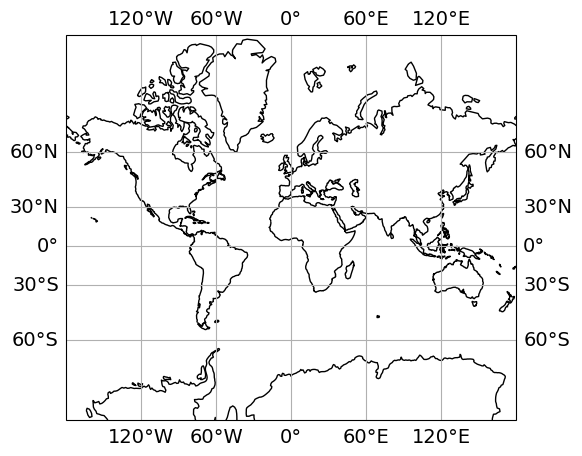

In [94]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

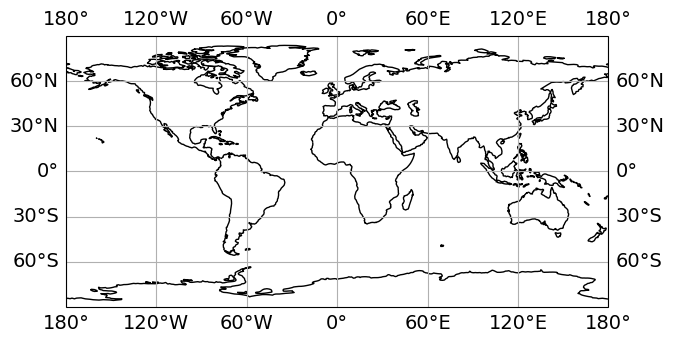

In [96]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

# -60 (60 W) is the same as 300 E (360 degrees in total 360-60W = 300E)

How do I zoom in?

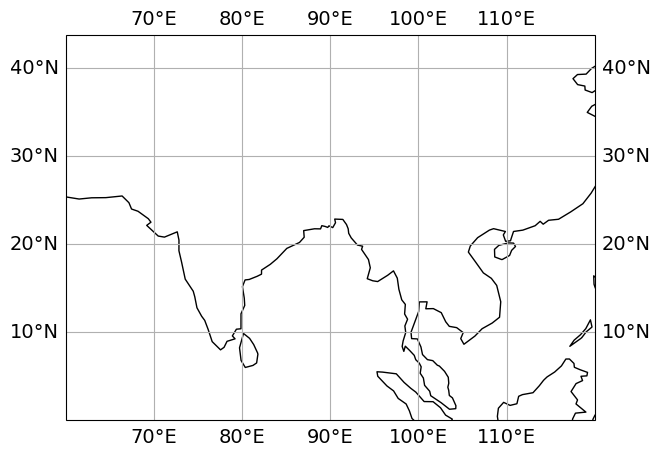

In [99]:
# let's zoom in to S Asia
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([60, 120, 0, 40]) # set the limits of the plot
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)


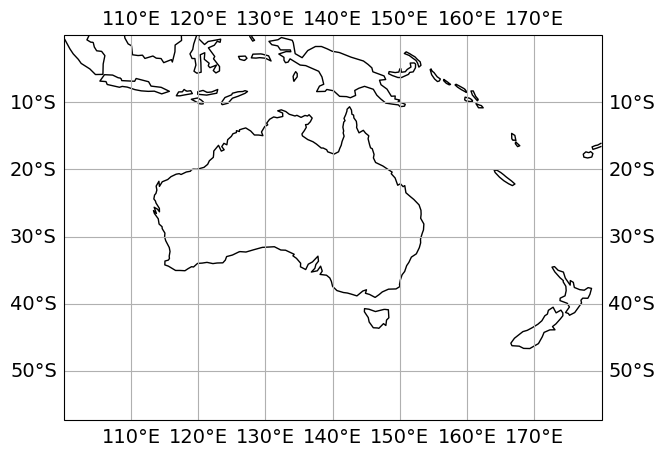

In [101]:
# make a plot of Australia

plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([100, 180, 0, -50]) # set the limits of the plot
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

#### Moving back to the Gulf of Mexico, we want to set the lat and lon range to match our HYCOM data. How do we find this?

In [104]:
#insert path or url to file here
# download from the internet
link = "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"

In [106]:
gom_data = xr.open_dataset(link, decode_times=False)

In [108]:
gom_data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
  * MT                     (MT) float64 3.653e+04
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
Data variables:
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM-TSIS
    institution:                     COAPS-FSU
    source:                          HYCOM archive file
    experiment:                      01.6
    comment:                         p-grid
    history:                         Fri Feb 11 20:08:27 2022: ncks -A -v wnd...
    history_of_appended_files:       Fri Feb 11 20:08:27 2022: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT

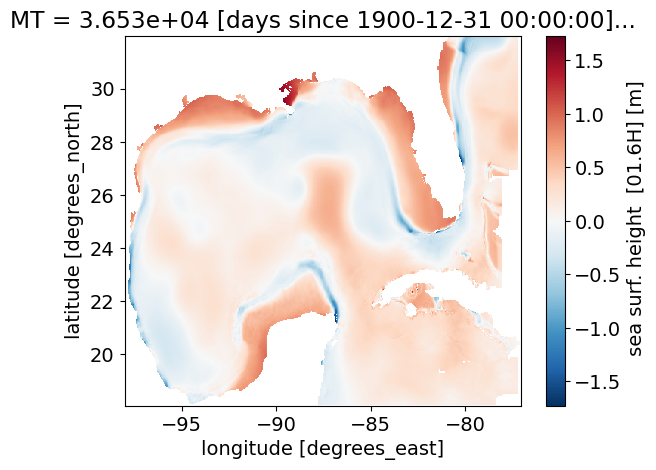

In [110]:
# let's remember what our data looked like, pick a variable to plot

gom_data.ssh.plot()

In [112]:
lat_min = gom_data.Latitude.min()
print(lat_min)

<xarray.DataArray 'Latitude' ()>
array(18.0916481)


In [114]:
lat_max = gom_data.Latitude.max()
print(lat_max)

<xarray.DataArray 'Latitude' ()>
array(31.96064758)


In [116]:
lon_min = gom_data.Longitude.min()
print(lon_min)

<xarray.DataArray 'Longitude' ()>
array(-98.)


In [118]:
lon_max = gom_data.Longitude.max()
print(lon_max)

<xarray.DataArray 'Longitude' ()>
array(-77.04000092)


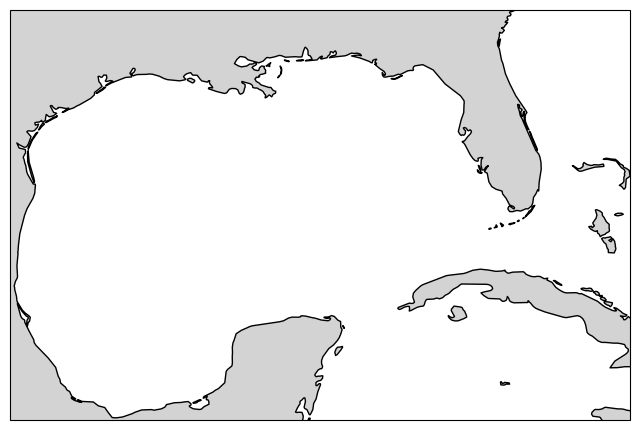

In [120]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 
# note the seqence of arguments for set_extent: x1, x2, y1, y2

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
# you can use named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# or with other methods: https://matplotlib.org/stable/users/explain/colors/colors.html

ax.add_feature(land_50m)

#### Let's make the land color a bit lighter gray

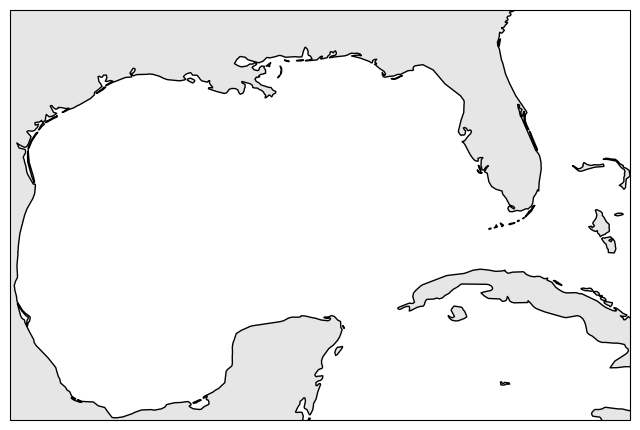

In [123]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 
# note the seqence of arguments for set_extent: x1, x2, y1, y2

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9') # 0 is black and 1 is white
# you can use named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# or with other methods: https://matplotlib.org/stable/users/explain/colors/colors.html

ax.add_feature(land_50m)

#### Now let's add some data

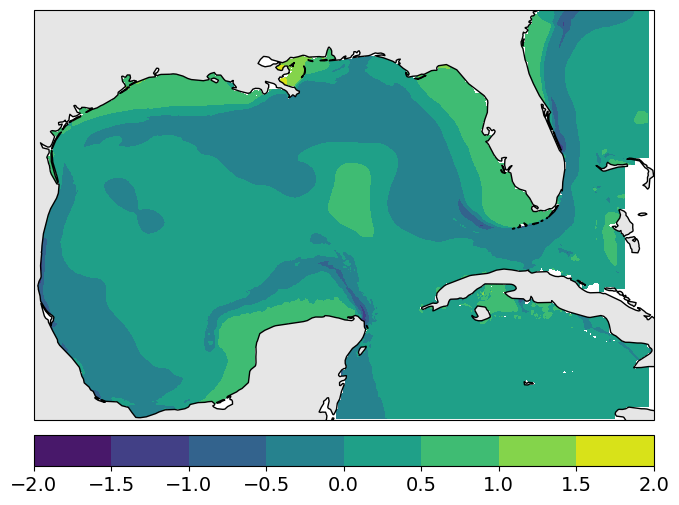

In [126]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 

# Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

# Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# Creates colorbar based on the contour. This allows us to get a quick look at our data range 
# before we start formatting the figure 
cbar = plt.colorbar(p, orientation='horizontal', pad=0.02)


#### Try taking out the options for the colorbar, what happens? What does "pad" do?

#### What is the range of our data?

In [131]:
var.max()

<xarray.DataArray 'ssh' ()>
array(1.58689272)
Coordinates:
    MT       float64 3.653e+04
    Date     float64 ...

In [133]:
var.min()

<xarray.DataArray 'ssh' ()>
array(-1.72738123)
Coordinates:
    MT       float64 3.653e+04
    Date     float64 ...

#### Let's set the countour levels to match our data range. I'm also going to change the colormap
See https://matplotlib.org/stable/users/explain/colors/colormaps.html
Note you can reverse any colormap by appending '_r' to the name

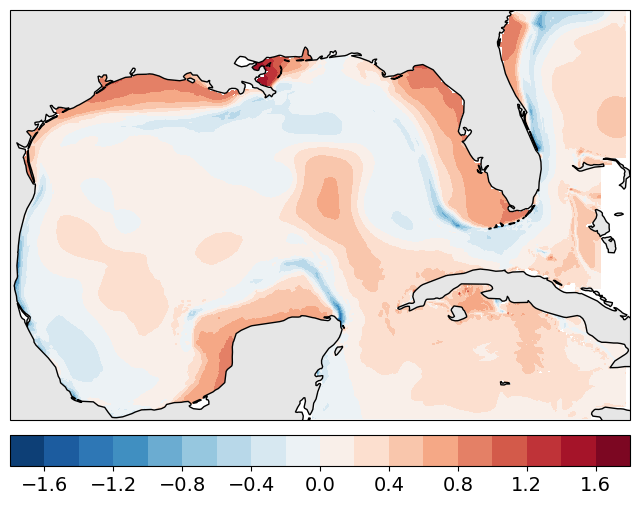

In [136]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

# looks like all the data is between around -1.8 to 1.6, let's set the contourlevels to this, centered at zero
# I'm also going to use a diverging colormap centered at zero
step = np.arange(-1.8,1.9,0.2)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) # projection is needed in every plot call

cbar = plt.colorbar(p, orientation='horizontal', pad=0.02)


#### Okay, now let's add some labels

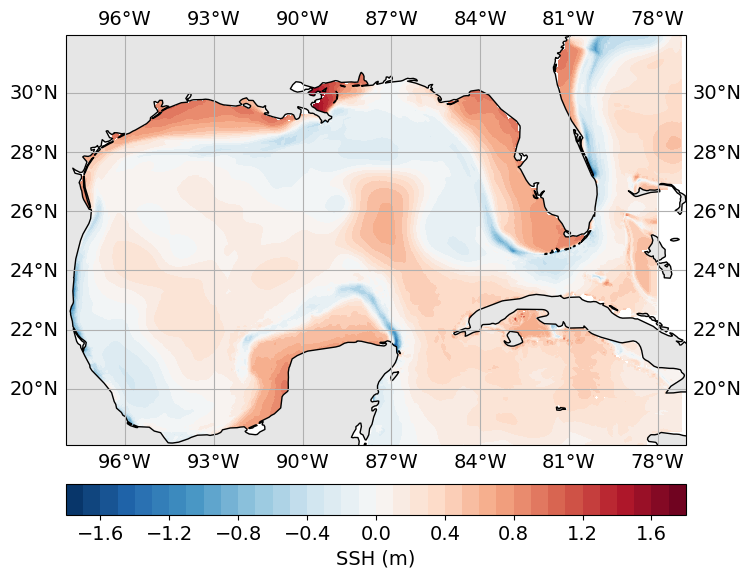

In [139]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-60)))
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) 
    
# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05)
cbar.set_label("SSH" +' (m)', size = 14)

ax.gridlines(draw_labels=True)


#### These labels are too small for what I want. I need them to be much bigger.

In [142]:
#Note we can easily make the lat/lon and colorbar font size bigger by adjusting the matplotlib parameters
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

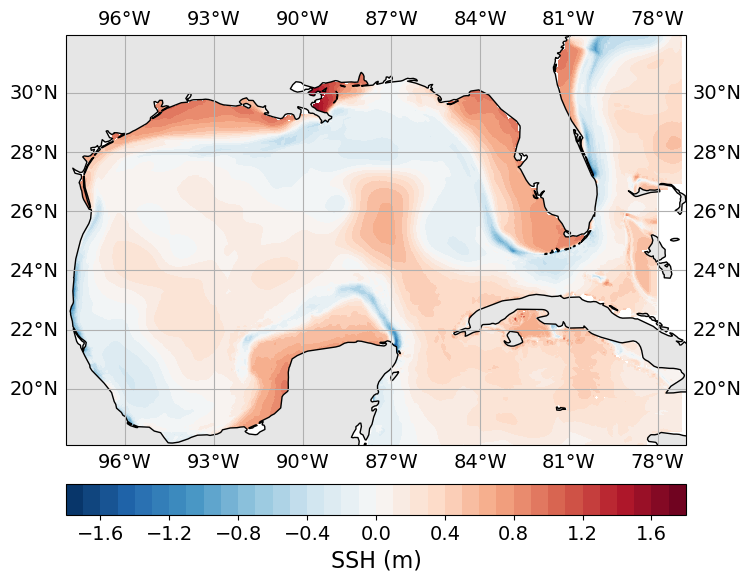

In [144]:
#exact same code as before

fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-60)))
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', # the '_r' reverses the colorpalate 
                    levels = step) 
    
# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05)
cbar.set_label("SSH" +' (m)', size = 16)

ax.gridlines(draw_labels=True)


#### Now let's explore how to do this all manually so we have total control

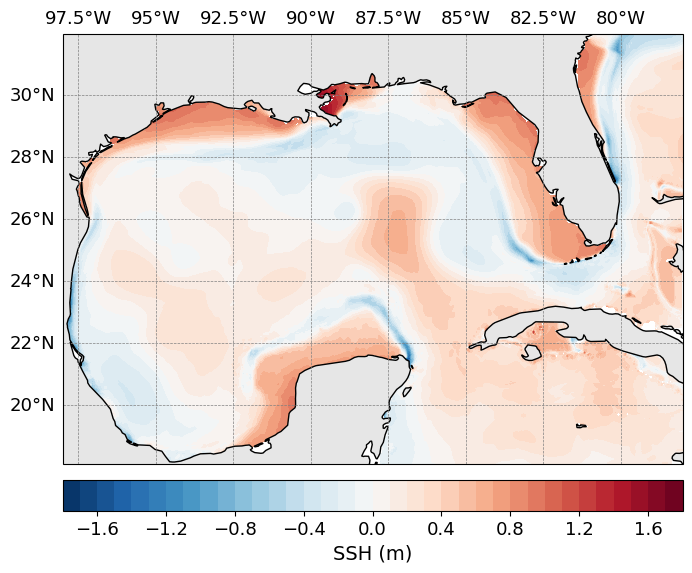

In [147]:
# OR we can use the formatter package to modify the lat/lon labels directly
# note this doesn't change the colorbar tick label fontsize, we have to add a line for that after the colorbar code

# I'm also going to cut out the white bits at right by adjusting lon_max
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, -78, lat_min, lat_max]) 

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.02) # move the colorbar up closer since we moved the longitude to top
cbar.set_label("SSH" +' (m)', size = 14)
# adjust the colorbar font size:
cbar.ax.tick_params(labelsize=13)

#ax.gridlines()

# Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
#     #and sets the grid lines on the graph
# Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = True    
gl.left_labels = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 13}
gl.ylabel_style = {'size' : 13}

#### Not bad

## Lab 6.2

**E.0** Finish Lab 6.1 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 3-4. Let me know if this feels like a good pace

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

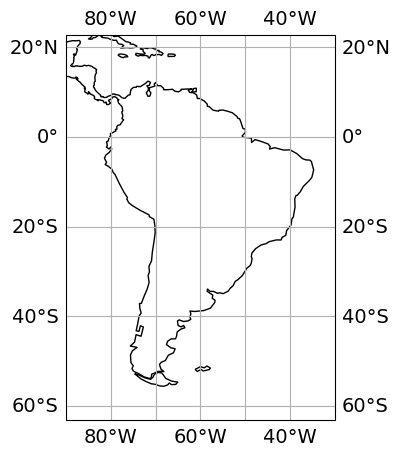

In [155]:
# make a plot of Australia

plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-30, -90, 20, -60]) # set the limits of the plot
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

In [157]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

In [ ]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], "blue", "Time (years)", "CO2 levels")


# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()
# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", "Time (years)", "Relative temperature (Celsius)")

plt.show()

In [ ]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

**E.3** Make a plot of a different variable for the HYCOM data. Play around with colormaps and contourlines to make it your own. Post your plot on the class slack #random channel

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up the map
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, lon_max, lat_min, lat_max])  

# Add coastlines with higher resolution (10m for more detail)
ax.coastlines(resolution='10m', color='black', linewidth=1)

# Gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

x = gom_data.Longitude
y = gom_data.Latitude
var = gom_data.ssh[0, :, :]  

# Contouring the data using the 'PiYG' colormap
step = np.arange(-1.8,1.9,0.2) 
p = ax.contourf(x, y, var, transform=ccrs.PlateCarree(), cmap='PiYG', levels = step)
# Create a new axis for the colorbar with manual placement
cbar_ax = fig.add_axes([0.99, 0.25, 0.04, 0.5])  # [left, bottom, width, height]

# Add the color bar with the new axis
cbar = plt.colorbar(p, cax=cbar_ax)
cbar.set_label('Sea Surface Height (m)')  # A label to the colorbar

ocean_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.8')
ax.add_feature(ocean_50m)

plt.show()

### This week's project:

#### Note you might want to restart your kernel at this point to dump all the hycom data from memory. Just reload the packages you need

**E.4** Download some data from the ISIMIP data archive (https://data.isimip.org/) and plot it using cartopy. ISIMIP provides bias-corrected daata for past and future climate simulations used for impacts studies world wide. Let's start with some maximum atmospheric surface temperature data in the historical period (1850-2014 for CMIP6). We want climate forcing data for ISIMIP3b, which are the lastest (CMIP6) climate projections. 

* https://data.isimip.org/search/tree/ISIMIP3b/InputData/climate/
* Click atmopsheric forcing
* Click GFDL... This is one of NOAA-GFDL's climate models (ESM4)
* Click historical

All of the variable names are in CMIP lingo. Sadly, there is no easy cheat sheet. But you want tas, which is "temperature of air at surface". Let's use the tasmax, the maximum daily surface air temperature
* Click tasmax
* Click files to see all the available files.
  
Here you have a choice, you can download an etire file (note the size) or you can use the "configure download" button, which has subsetting by space or country, as well as time opitons. You can click on a file name to see more info.
* Click on "download file" for the 1851-1860 file. Just grab the whole file, it will take a minute to download.
* Load up the data into xarray and plot the maximum of this dataset (so max over the decade for each gridcell. You just use a max function for this, no loops needed).
* Plot using cartopy to make it pretty. Put some sensible lables on it, etc. Maybe add some country boundaries.

In [159]:
import xarray as xr
# make sure you also have nectdf4 installed!

In [167]:
# here I am going to grab the hindcast they made for Jan 1 2001. 
# Note I had to add the http: in front of the opendap link (see "open data here" button)
# download from the internet
#link =  "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"

# or download the file by clicking on the https server link and putting the correct path

file_path= r"C:\Users\anany\Downloads\1ST SEMESTER\OCS 4001 PROF CHERYL HARRISON\LAB SUBMISSIONS\6.2\gfdl-esm4_r1i1p1f1_w5e5_historical_tasmax_global_daily_1851_1860.nc"

In [169]:
data = xr.open_dataset(file_path, decode_times=False)

In [171]:
data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 3653)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.65e+03 3.651e+03 3.652e+03
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...

In [173]:
lat_min = data.lat.min()
print(lat_min)

<xarray.DataArray 'lat' ()>
array(-89.75)


In [175]:
lat_max = data.lat.max()
print(lat_max)

<xarray.DataArray 'lat' ()>
array(89.75)


In [177]:
lon_min = data.lon.min()
print(lon_min)

<xarray.DataArray 'lon' ()>
array(-179.75)


In [179]:
lon_max = data.lon.max()
print(lon_max)

<xarray.DataArray 'lon' ()>
array(179.75)


In [197]:
# get the max values
data_max = data.max(dim='time')
data_max

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 274.9 274.9 274.9 274.9 ... 258.2 258.3 258.3

In [193]:
#Save to netcdf
data.to_netcdf('data.nc')

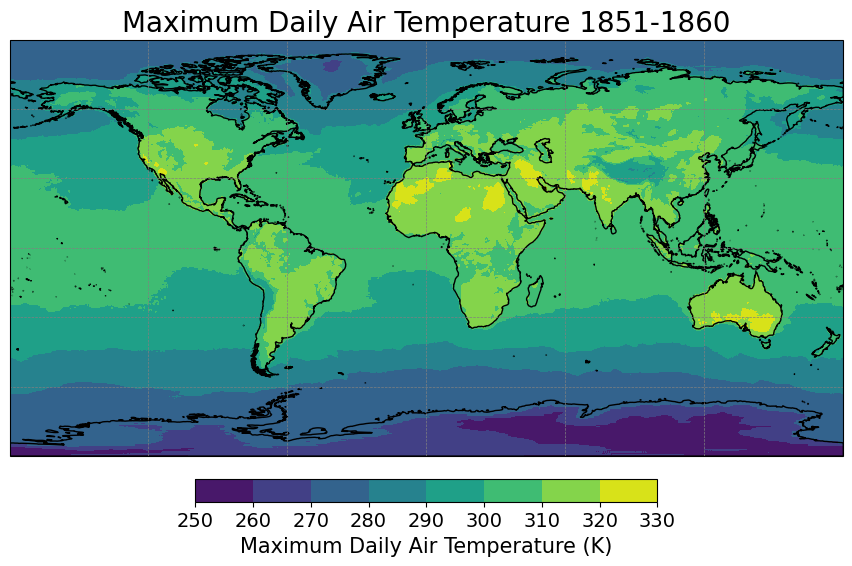

In [268]:
fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.PlateCarree()))  
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_title('Maximum Daily Air Temperature 1851-1860', size = 20)

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = data_max.lon
y = data_max.lat
var =  data_max.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Maximum Daily Air Temperature' +' (K)', size = 15)

# ##Set the grid lines without labels to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

**E.5** Now make a second plot using ISIMP data for a future climate projection. Following the same steps as above, get the GFDL tasmax data for the future climate scenario SSP3-7.0 (higher emissions scenario) for 2051-2060. Again, calculate the maximum at each gridpoint for this data set. This is the future maximum daily temperature for that decade. Make your plot nice.

In [205]:
# or download the file by clicking on the https server link and putting the correct path
file_path= r"C:\Users\anany\Downloads\1ST SEMESTER\OCS 4001 PROF CHERYL HARRISON\LAB SUBMISSIONS\6.2\gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmax_global_daily_2051_2060.nc"

In [207]:
data_future = xr.open_dataset(file_path, decode_times=False)

In [209]:
data_future

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 3653)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.65e+03 3.651e+03 3.652e+03
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...

In [211]:
# get the max values
data_future_max = data_future.max(dim='time')
data_future_max

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 275.3 275.3 275.4 275.3 ... 255.0 255.3 255.0

In [213]:
#Save to netcdf
data_future_max.to_netcdf('data_future_max.nc')

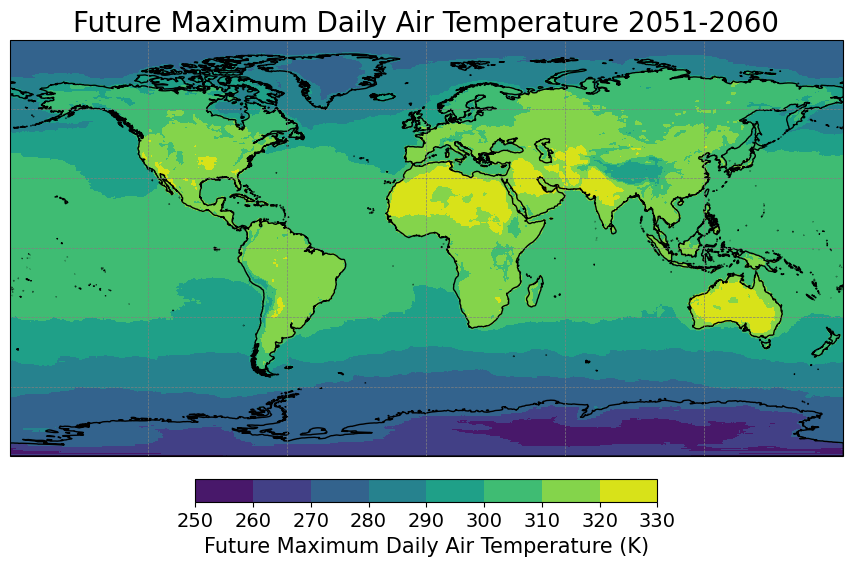

In [266]:
fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.PlateCarree()))  
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_title('Future Maximum Daily Air Temperature 2051-2060', size = 20)

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = data_future_max.lon
y = data_future_max.lat
var = data_future_max.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Future Maximum Daily Air Temperature' +' (K)', size = 15)

# ##Set the grid lines without labels to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

**E.6** Now plot the anomaly between the two, 2050's - 1850's. Use a diverging colormap (light in the middle), centered on zero. What is the outlook for your country of orgin? Answer in full sentances with specific numbers.

In [219]:
## Estimate the anomaly
anomaly = data_future_max - data_max
anomaly

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 0.4561 0.4357 0.4763 ... -3.239 -2.983 -3.259

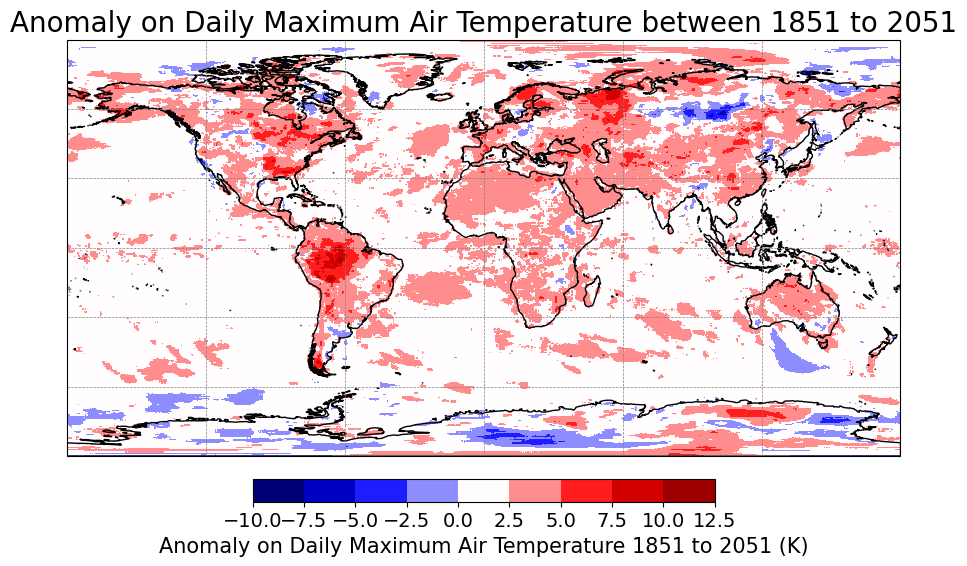

In [270]:
fig, ax = plt.subplots(figsize =(13,6), subplot_kw={'projection': ccrs.PlateCarree()})  
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_title('Anomaly on Daily Maximum Air Temperature between 1851 to 2051', size = 20)

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = anomaly.lon
y = anomaly.lat
var = anomaly.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap='seismic')

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Anomaly on Daily Maximum Air Temperature 1851 to 2051' +' (K)', size = 15)

# ##Set the grid lines without labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

**Results for Bangladesh**

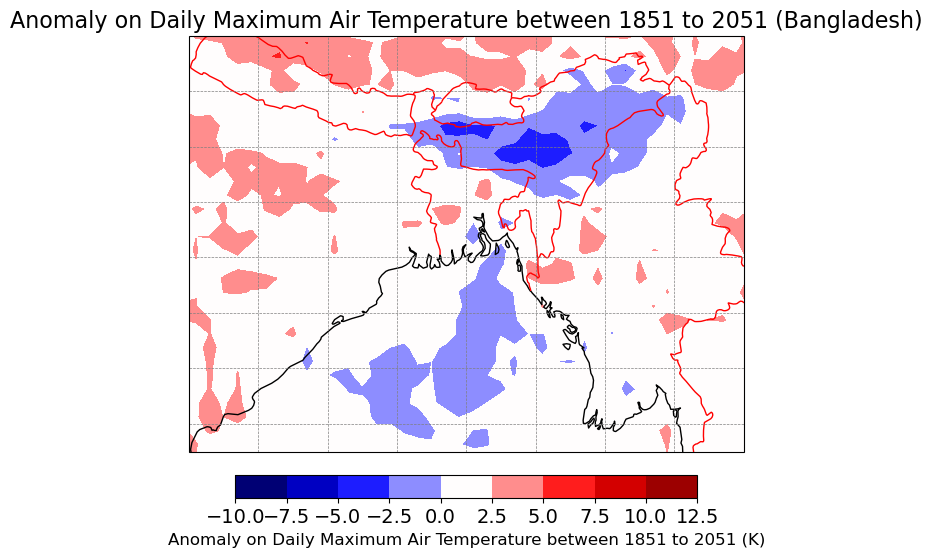

In [274]:
fig, ax = plt.subplots(figsize =(8,6), subplot_kw={'projection': ccrs.PlateCarree()})  
ax.set_title('Anomaly on Daily Maximum Air Temperature between 1851 to 2051 (Bangladesh)', size=16)

# Set the extent to focus on Bangladesh
ax.set_extent([80, 100, 15, 30], crs=ccrs.PlateCarree())

# Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='none')
ax.add_feature(land_50m)


# Add Bangladesh's borders with a thicker line
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle='-', edgecolor='red', linewidth=1.0)

# Let's fill in the following:
x = anomaly.lon
y = anomaly.lat
var = anomaly.tasmax
p = ax.contourf(x, y, var, transform=ccrs.PlateCarree(), cmap='seismic')

# Creates colorbar based on the contour 
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Anomaly on Daily Maximum Air Temperature between 1851 to 2051 (K)', size=12)

# Set the grid lines without labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=0.5, color='gray', linestyle='--')

plt.show()

From the map, we can observe that Bangladesh is experiencing a significant temperature increase between the 1850s and the 2050s. 
The anomaly in the region shows a rise of about 2.5K to 5.0K in maximum air temperature.

**E.7** How could you potentially use this kind of data (future climate projections) in your research? Do some brainstorming. Write down your thoughts here.

I could use future climate projection data to study how changes in temperature will impact agriculture, land use, and public health in my home country, Bangladesh. For example, rising temperatures may reduce crop yields, making it harder for farmers to grow enough food. I could investigate which crops will be most affected and how farmers might adapt by using heat-tolerant varieties or new farming methods. In cities like Dhaka, the data could help predict more intense heatwaves, which can pose serious health risks, especially for vulnerable populations.

Additionally, climate data could be used to assess the impacts of rising sea levels on coastal areas, as Bangladesh is highly vulnerable to flooding. This would help identify regions most at risk of becoming uninhabitable, guiding future planning for relocating communities and managing migration.